In [1]:
# Import libraries
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate
import matplotlib.pyplot as plt

# Initialize runtime service and backend
service = QiskitRuntimeService()

%matplotlib inline

In [2]:
# Function used to show the figure of a circuit, simulate it and display the counts of each state
def circuitResults(title, qc):
    # Show figure of circuit
    fig = qc.draw("mpl")
    fig.suptitle(title)
    plt.show()

    # Simulator
    simulatorUsed = AerSimulator()
    transpiled_circuit = transpile(qc, simulatorUsed)
    result = simulatorUsed.run(transpiled_circuit).result()

    # Get counts of states
    counts = result.get_counts(transpiled_circuit)
    print(counts)

    # Histogram of counts
    plot_histogram(counts)
    plt.show()

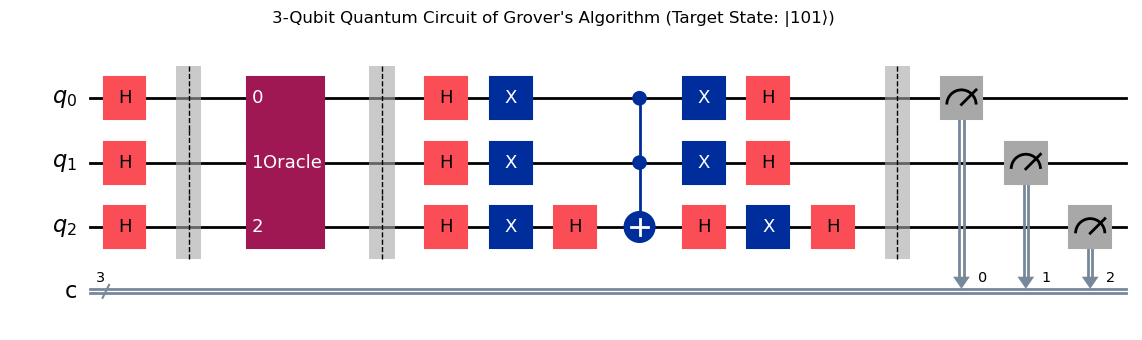

{'101': 811, '011': 29, '010': 31, '100': 35, '111': 28, '110': 38, '000': 29, '001': 23}


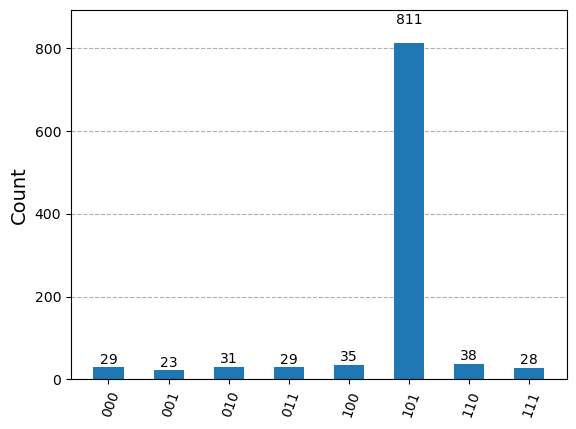

Job ID is cysbzvqx46r00084b360
{'101': 1869, '011': 378, '001': 200, '111': 636, '110': 352, '000': 282, '010': 203, '100': 176}


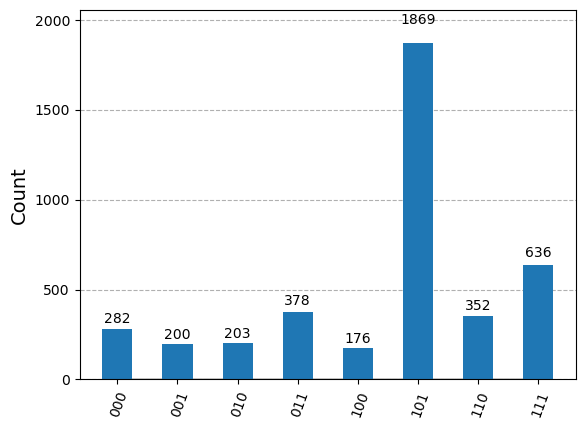

In [17]:
# Define target state
target = "101"

n = len(target)

# Oracle subcircuit
# X Gates to flip qubits with 0 state to achieve 1 for every qubit
oracle = QuantumCircuit(n, name="Oracle")

for i, bit in enumerate(reversed(target)):  # Reverse to match Qiskit indexing
    if bit == "0":
        oracle.x(i)

oracle.h(n-1)  # Hadamard on the last qubit
oracle.append(MCXGate(n-1), list(range(n-1)) + [n-1])  # Multi-controlled X to flip phase (Control: First to second-last qubits; Target: Last qubit)
oracle.h(n-1)  # Hadamard back

# Undo X Gates
for i, bit in enumerate(reversed(target)):  # Reverse to match Qiskit indexing
    if bit == "0":
        oracle.x(i)

# Convert oracle to a gate
oracle_gate = oracle.to_gate(label="Oracle")


qc = QuantumCircuit(n, n)   # Initialize 4 qubit and 4 classical bits for recording results

# Create superposition state, |s⟩
qc.h(range(n))

qc.barrier()

# Apply Oracle
qc.append(oracle_gate, range(n))

qc.barrier()

# Diffuser (Inversion about the mean)
qc.h(range(n))
qc.x(range(n))
qc.h(n-1) 
qc.append(MCXGate(n-1), list(range(n-1)) + [n-1])  # Multi-controlled X to flip phase (Control: First to second-last qubits; Target: Last qubit)
qc.h(n-1)
qc.x(range(n))
qc.h(range(n))

qc.barrier()

# Map outputs to classical bits
qc.measure(range(n), range(n))

circuitResults(f"{n}-Qubit Quantum Circuit of Grover's Algorithm (Target State: |{target}⟩)", qc)

backend = service.least_busy(operational=True, simulator=False)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
# Wait for the job to complete and retrieve the results
sampler = Sampler(backend)
job = sampler.run([isa_circuit])
print(f"Job ID is {job.job_id()}")
# Wait for the job to complete and get the result
job_result = job.result()
pub_result = job_result[0]
# Get the counts from the result
counts = pub_result.data.c.get_counts()
print(f"{counts}")
# Visualize the result
plot_histogram(counts)
plt.hist(counts, bins=30, color='skyblue', edgecolor='black')
plt.show()

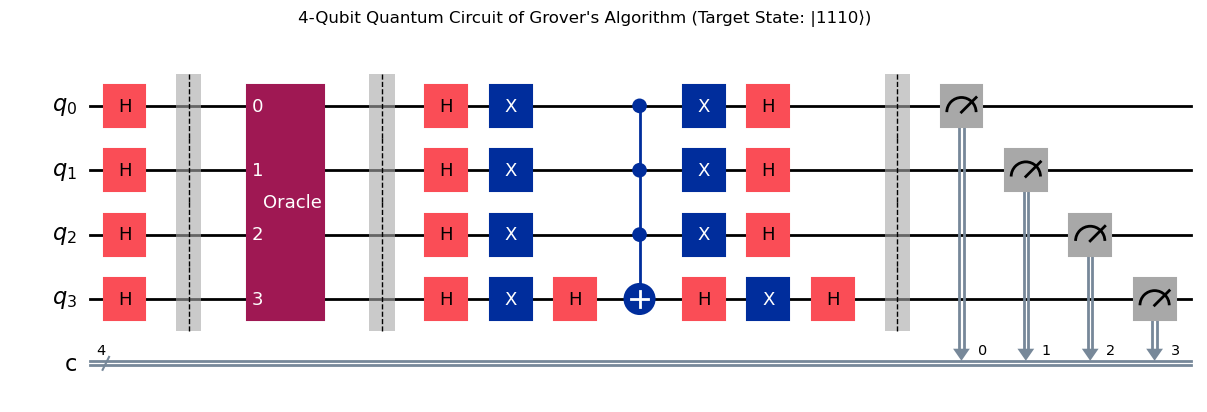

{'0101': 36, '1110': 490, '0001': 32, '0110': 31, '0010': 44, '0100': 39, '0011': 36, '0111': 39, '0000': 32, '1001': 32, '1000': 33, '1101': 38, '1111': 39, '1011': 30, '1100': 38, '1010': 35}


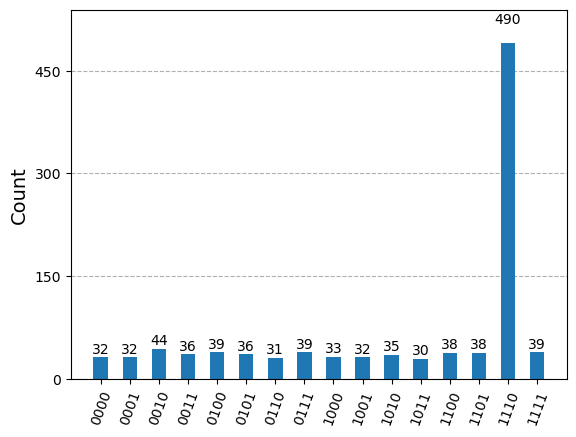

Job ID is cysbzjp1j2e0008v09w0
{'0001': 205, '0110': 323, '1110': 281, '1000': 291, '0111': 324, '0010': 264, '0101': 185, '0000': 204, '1001': 225, '0100': 189, '1100': 371, '1101': 244, '0011': 195, '1011': 240, '1010': 152, '1111': 403}


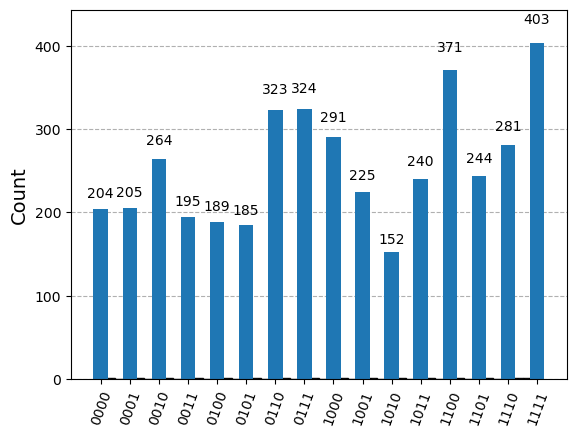

In [16]:
# Define target state
target = "1110"

n = len(target)

# Oracle subcircuit
# X Gates to flip qubits with 0 state to achieve 1 for every qubit
oracle = QuantumCircuit(n, name="Oracle")

for i, bit in enumerate(reversed(target)):  # Reverse to match Qiskit indexing
    if bit == "0":
        oracle.x(i)

oracle.h(n-1)  # Hadamard on the last qubit
oracle.append(MCXGate(n-1), list(range(n-1)) + [n-1])  # Multi-controlled X to flip phase (Control: First to second-last qubits; Target: Last qubit)
oracle.h(n-1)  # Hadamard back

# Undo X Gates
for i, bit in enumerate(reversed(target)):  # Reverse to match Qiskit indexing
    if bit == "0":
        oracle.x(i)

# Convert oracle to a gate
oracle_gate = oracle.to_gate(label="Oracle")


qc = QuantumCircuit(n, n)   # Initialize 4 qubit and 4 classical bits for recording results

# Create superposition state, |s⟩
qc.h(range(n))

qc.barrier()

# Apply Oracle
qc.append(oracle_gate, range(n))

qc.barrier()

# Diffuser (Inversion about the mean)
qc.h(range(n))
qc.x(range(n))
qc.h(n-1) 
qc.append(MCXGate(n-1), list(range(n-1)) + [n-1])  # Multi-controlled X to flip phase (Control: First to second-last qubits; Target: Last qubit)
qc.h(n-1)
qc.x(range(n))
qc.h(range(n))

qc.barrier()

# Map outputs to classical bits
qc.measure(range(n), range(n))

circuitResults(f"{n}-Qubit Quantum Circuit of Grover's Algorithm (Target State: |{target}⟩)", qc)

backend = service.least_busy(operational=True, simulator=False)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
# Wait for the job to complete and retrieve the results
sampler = Sampler(backend)
job = sampler.run([isa_circuit])
print(f"Job ID is {job.job_id()}")
# Wait for the job to complete and get the result
job_result = job.result()
pub_result = job_result[0]
# Get the counts from the result
counts = pub_result.data.c.get_counts()
print(f"{counts}")
# Visualize the result
plot_histogram(counts)
plt.hist(counts, bins=30, color='skyblue', edgecolor='black')
plt.show()